<a href="https://colab.research.google.com/github/KimYongHwi/machine-learning-study/blob/main/natural_language_processing/3_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 군집 분석(Cluster Analysis)
- 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
- 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
- 텍스트에 대한 군집 분석에는 군집으로 묶여진 텍스트끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

### 텍스트 유사도
- 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
- 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 컨텍스트에 존재하는 총 고유 용어 수의 비율을 사용
- 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [44]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()

    # 표제어 추출
    # 표제어: 사전에서 단어의 뜻을 찾을 때 쓰는 기본형이라고 생각하면 된다.
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

    # 공통된 용어의 수와 해당 컨텍스트에 존재하는 총 고유 용어 수의 비율
    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))

    return inter/union

In [46]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to becom a man of value."
d3 = "Give me liberty, of give me death"

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.21052631578947367
0.06666666666666667
0.05555555555555555


In [47]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense() # todense: 밀집 matrix 반환

print(tfidf)
print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))


[[0.28050841 0.28050841 0.28050841 0.         0.         0.
  0.         0.         0.         0.56101683 0.42666776 0.
  0.         0.33134558 0.         0.         0.28050841 0.28050841
  0.         0.         0.        ]
 [0.         0.         0.         0.23119359 0.23119359 0.23119359
  0.         0.         0.         0.         0.35165737 0.
  0.23119359 0.27309332 0.23119359 0.23119359 0.         0.
  0.46238718 0.46238718 0.23119359]
 [0.         0.         0.         0.         0.         0.
  0.31085255 0.62170509 0.31085255 0.         0.         0.62170509
  0.         0.18359452 0.         0.         0.         0.
  0.         0.         0.        ]]
[[0.24052912]]
[[0.06083323]]
[[0.05013844]]


### 한국어 형태소 분석기 설치
- konlpy, MeCab

In [48]:
!set -x \
&& pip install konlpy \
&& sudo apt-get install curl git \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ sudo apt-get install curl git
Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.13).
git is already the newest version (1:2.17.1-1ubuntu0.8).
0 upgraded, 0 newly installed, 0 to remove and 70 not upgraded.
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo '

#### 네이버 영화 리뷰 데이터
- https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [49]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [50]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])

print(reviews)

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.', '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화', '완전 감동입니다 다시봐도 감동', '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음', '굿', '바보가 아니라 병 쉰 인듯', '내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...', '재밌다', '고질라니무 귀엽다능ㅋㅋ', '영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.', '3도 반전 좋았제 ^^', '평점 왜 낮아? 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다.', '네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..', '단연 최고', '가면 갈수록 더욱 빠져드네요 밀회 화이팅!!', '어?생각없이 봤는데 상당한 수작.일본영화 10년내 최고로 마음에 들었다.강렬한 임팩트가 일품.', '오랜만에 본 제대로 된 범죄스릴러~', "그런 때가 있었다. ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때. 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다.", '마지막씬을 잊을수가 없다', '강압적용서,세뇌적용서에 대한 비판', '중세시대명작. 굿 평점이왜이래', '7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다. 아름답고 슬픈 OST, 제니퍼코넬리의 눈부신 아역시절, 로버트드니

In [51]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

### Word2Vec 생성
- word2vec 생성에 필요한 라이브러리 추가

In [52]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

- word2Vec 모델을 생성
- gensim의 word2Vec은 선언과 동시에 학습을 해 단어 백터들을 생성

In [53]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [54]:
word2vec.most_similar("영화")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('작품', 0.9569418430328369),
 ('듯', 0.9529179334640503),
 ('마음', 0.9513205289840698),
 ('이야기', 0.9504188299179077),
 ('표현', 0.9480446577072144),
 ('모습', 0.9457728862762451),
 ('따뜻', 0.9446538686752319),
 ('잔잔', 0.9426313638687134),
 ('내', 0.941921055316925),
 ('흐뭇', 0.9386869668960571)]

- t-sne를 이용한 단어 벡터 시각화

In [55]:
tsne = TSNE(n_components=2) # 2차원으로 변환
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [56]:
vocab = word2vec.wv.vocab
print('vocab: ', vocab)
similarity = word2vec[vocab]
print('similarity: ', similarity)

vocab:  {'어릴': <gensim.models.keyedvectors.Vocab object at 0x7fcee394be50>, '때': <gensim.models.keyedvectors.Vocab object at 0x7fcee394be90>, '보': <gensim.models.keyedvectors.Vocab object at 0x7fcee394bf10>, '고': <gensim.models.keyedvectors.Vocab object at 0x7fcee394bf50>, '지금': <gensim.models.keyedvectors.Vocab object at 0x7fcee392c9d0>, '다시': <gensim.models.keyedvectors.Vocab object at 0x7fcee392c250>, '봐도': <gensim.models.keyedvectors.Vocab object at 0x7fcee392c950>, '재밌': <gensim.models.keyedvectors.Vocab object at 0x7fcee392cfd0>, '어요': <gensim.models.keyedvectors.Vocab object at 0x7fcee394bf90>, 'ㅋㅋ': <gensim.models.keyedvectors.Vocab object at 0x7fcee392ccd0>, '을': <gensim.models.keyedvectors.Vocab object at 0x7fcee392cf50>, '배우': <gensim.models.keyedvectors.Vocab object at 0x7fcee392cc10>, '는': <gensim.models.keyedvectors.Vocab object at 0x7fcee392ced0>, '학생': <gensim.models.keyedvectors.Vocab object at 0x7fcee392cad0>, '으로': <gensim.models.keyedvectors.Vocab object at 0x7fcee3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index = vocab, columns = ['x', 'y']) # x, y: 좌표값
df.head()

,x,y
어릴,11.474620,-28.738361
때,-25.029881,-50.400997
보,-23.341686,-49.412052
고,-24.165014,-48.282581
지금,-21.568392,-48.342907


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


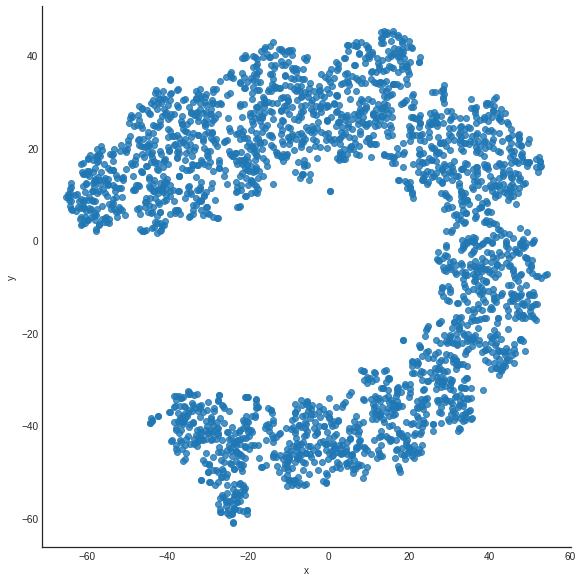

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

### Scikit-learn, Scipy를 이용한 계층적 군집화
- 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
- 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점
- 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼

### Scikit-learn
- 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습
- 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터를 합치며 진행
- 병합 군집의 종료 조건에는 3가지를 지정 가능
  1. ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2. average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3. complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침
- scikit-learn 사용 예제에서는 종료 조건 간의 차이를 비교

### ward

In [69]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([4, 2, 2, ..., 1, 1, 1])

In [70]:
results = df
results['predict'] = predict

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


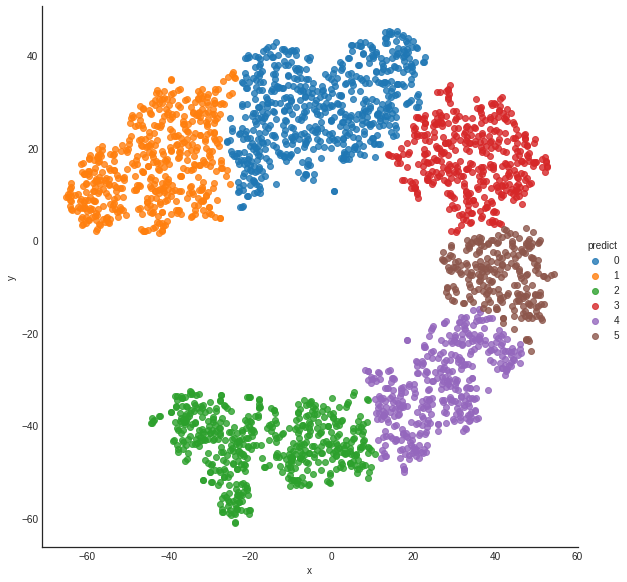

In [71]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue='predict')
plt.show()

### average

In [72]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([4, 0, 0, ..., 3, 3, 3])

In [73]:
results = df
results['predict'] = predict

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


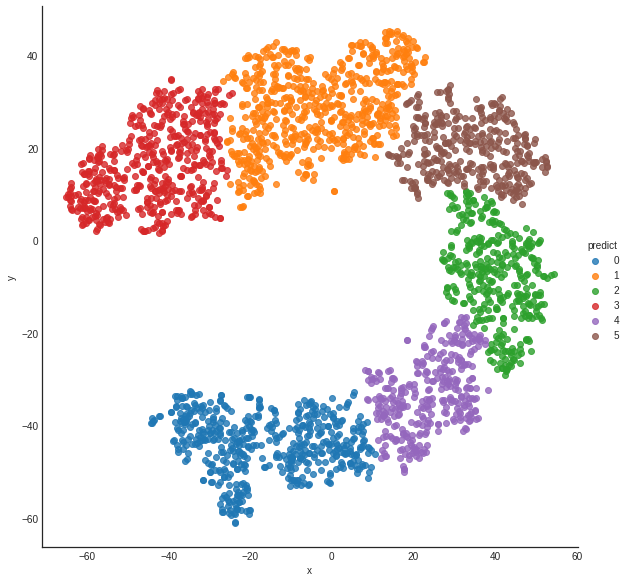

In [74]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue='predict')
plt.show()

### complete

In [75]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([1, 2, 2, ..., 3, 3, 3])

In [76]:
results = df
results['predict'] = predict

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


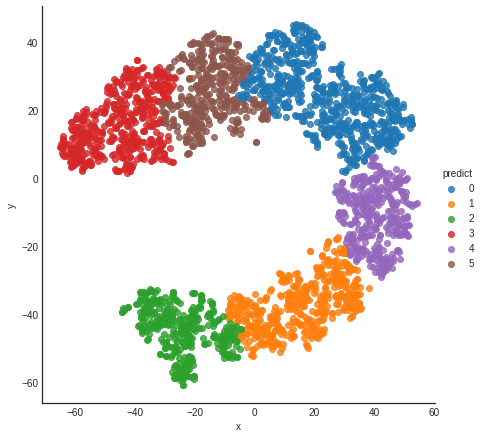

In [78]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### Scipy
- scipy를 이용한 거리 사용과 word2vec 사용을 비교
- `pdist`를 이용한 각 단어간 유클리디안 거리 계산


In [81]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,42.459962,40.504033,40.659071,38.434084,39.040711,39.079952,48.529618,47.518383,47.754680,46.503152,50.337504,46.210834,50.899930,49.596517,49.694945,63.165409,50.120235,48.409389,48.471431,45.868040,83.531095,42.669812,58.903779,39.382575,45.633249,43.083395,46.776856,47.362568,23.181795,47.353616,31.057736,47.574484,43.939490,66.804800,29.430639,47.813477,34.946246,34.257660,24.319603,...,66.626883,62.686591,59.995170,83.607699,65.486488,78.303634,57.213580,58.819569,74.119650,84.605557,64.738760,79.045927,61.308520,74.010286,67.764214,77.907565,79.591325,83.926248,66.267662,57.109458,82.641938,74.016463,75.639140,18.961292,60.743898,70.462143,78.866088,61.549037,66.276029,63.815018,56.514652,81.502146,52.338223,82.846018,74.093695,66.141605,67.660765,77.641599,85.833355,83.848934
1,42.459962,0.000000,1.956531,2.288161,4.027113,3.480161,3.690999,8.509830,8.498599,10.639273,20.340605,19.613971,19.979625,92.240006,17.951883,20.383989,87.833462,19.581642,20.120559,20.051711,17.602844,75.915204,84.868558,99.187869,15.936450,17.066997,85.264243,7.024187,4.954129,25.961053,15.912800,15.688037,17.778959,4.969279,80.177419,13.613855,18.111629,8.882320,12.123838,59.662143,...,65.510957,71.994798,61.248820,76.242313,56.628342,74.501068,76.418969,79.315400,91.260787,71.053428,72.423943,68.981028,62.847831,62.497680,66.428338,69.405953,82.122476,69.848811,63.807298,56.471641,71.955187,62.043735,71.254191,58.548093,86.105144,74.897174,64.715668,56.777970,87.395404,70.127646,70.190405,68.197708,86.093632,73.036675,81.361502,57.288157,63.930507,65.339775,76.184810,71.255392
2,40.504033,1.956531,0.000000,1.397703,2.070663,1.588484,2.022140,9.910690,9.671826,11.558784,20.384485,20.122683,20.009647,90.314661,18.490873,20.769234,86.401707,20.067586,20.380563,20.322509,17.710751,75.772035,82.915858,97.294117,15.323547,17.174026,83.311961,8.277696,6.895917,24.253500,16.308921,14.133656,18.082211,5.777727,79.118613,11.720797,18.423182,7.237049,10.733743,57.819943,...,64.965421,71.044365,60.550045,76.088606,56.378238,74.158265,75.121697,77.988237,90.110721,71.190101,71.543793,68.914565,62.152803,62.453322,65.901702,69.260961,81.532805,70.005830,63.309715,55.804932,71.943940,62.020327,70.915695,56.630551,84.643977,74.175753,64.836985,56.317073,86.082748,69.287505,69.054540,68.299890,84.371424,72.986913,80.559848,57.045551,63.496042,65.363934,76.147897,71.341282
3,40.659071,2.288161,1.397703,0.000000,2.597323,2.558900,3.216510,10.763145,10.668173,12.687562,18.987436,18.758047,18.612902,90.214627,17.133068,19.387171,85.555140,18.699374,18.987785,18.930446,16.313131,74.392721,83.147896,97.087189,14.023301,15.776429,83.549002,9.221635,6.752926,25.099376,14.931474,15.161782,16.693552,4.589137,78.021594,12.302541,17.035056,6.626046,9.842344,58.439830,...,63.663518,69.892869,59.294901,74.710551,55.012528,72.809706,74.171680,77.059847,89.065248,69.792730,70.360678,67.527231,60.896529,61.063977,64.594760,67.881641,80.244483,68.608296,61.995013,54.538582,70.552419,60.629416,69.566147,57.062600,83.822791,72.929533,63.439825,54.992733,85.143759,68.087475,68.000360,66.903137,83.837926,71.598274,79.343819,55.678735,62.166130,63.970167,74.758308,69.944998
4,38.434084,4.027113,2.070663,2.597323,0.000000,0.863967,1.552822,11.584599,11.172341,12.808416,20.608057,20.824252,20.222496,88.273884,19.238541,21.340617,84.891066,20.746849,20.827863,20.781416,18.031084,75.649173,80.851191,95.286060,14.902970,17.500578,81.247857,9.872303,8.955749,22.504925,16.941131,12.630033,18.598040,7.117812,78.013469,9.753422,18.943460,5.693964,9.460824,55.888165,...,64.422343,70.060705,59.846476,75.954330,56.160489,73.824289,73.760431,76.593427,88.902768,71.366852,70.

- 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

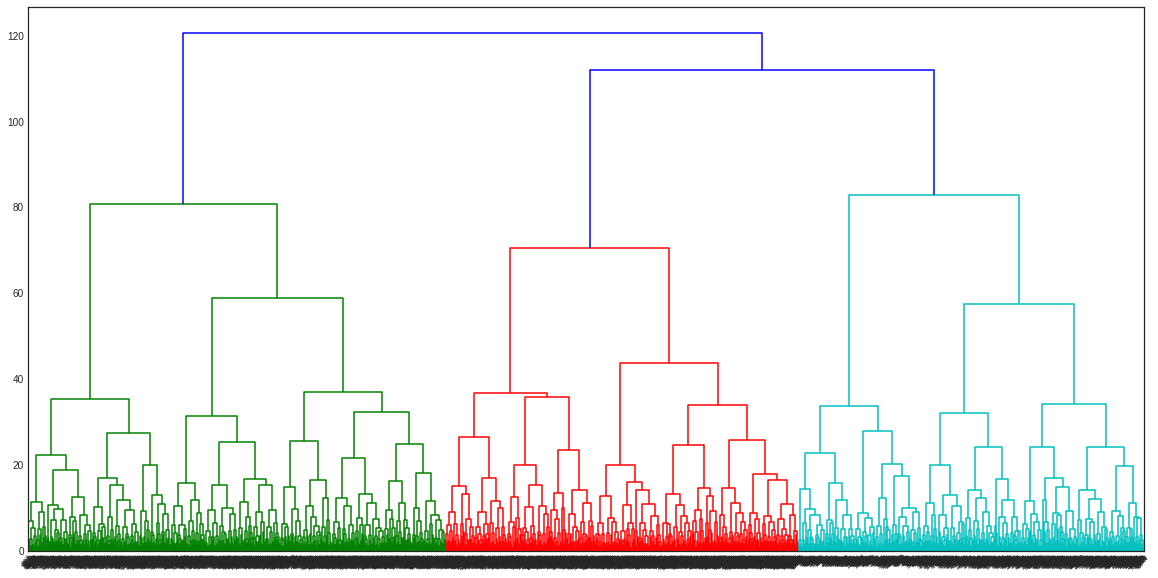

In [85]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

- word2vec을 이용한 군집 분석 및 덴드로그램 시각화

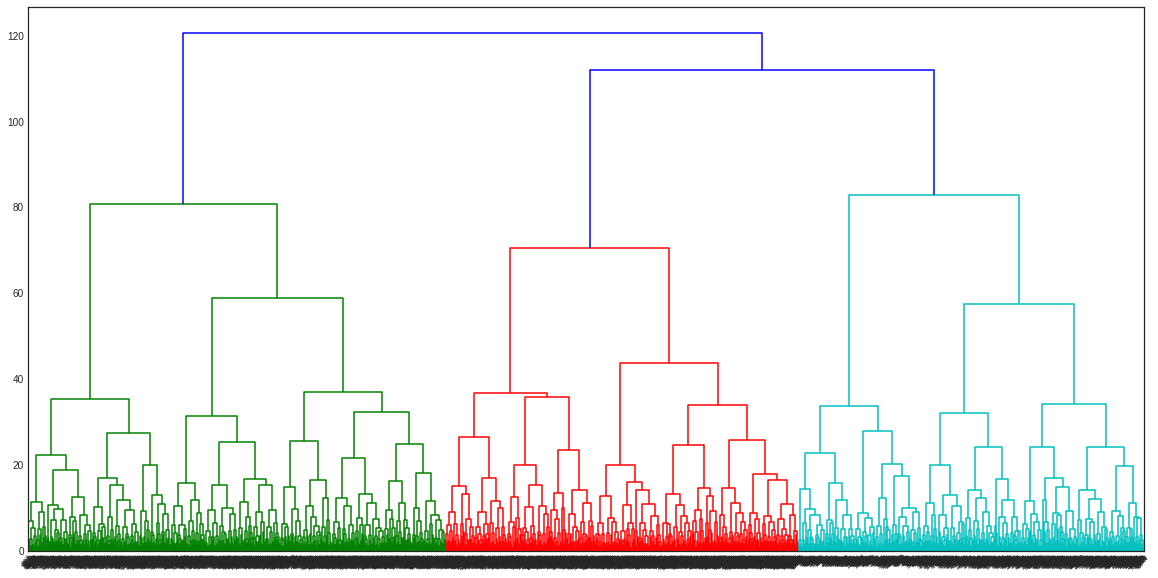

In [86]:
mergins = linkage(df, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(mergins,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

### Scikit-learn을 이용한 비계층적 군집화
- 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
- 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요
- 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [96]:
results = df
results['predict'] = predict
results

,x,y,predict
어릴,11.474620,-28.738361,0
때,-25.029881,-50.400997,0
보,-23.341686,-49.412052,0
고,-24.165014,-48.282581,0
지금,-21.568392,-48.342907,0
...,...,...,...
하지원,-46.733196,2.607484,2
아줌마,-43.370686,10.833998,2
예뻐,-57.904640,6.057274,2
비밀,-61.431450,16.517244,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


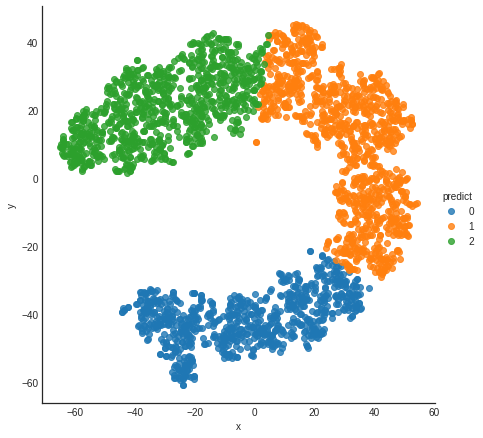

In [97]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')

### 클러스터 개수 6

In [99]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([4, 2, 2, ..., 1, 1, 1], dtype=int32)

In [100]:
results = df
results['predict'] = predict
results

,x,y,predict
어릴,11.474620,-28.738361,4
때,-25.029881,-50.400997,2
보,-23.341686,-49.412052,2
고,-24.165014,-48.282581,2
지금,-21.568392,-48.342907,2
...,...,...,...
하지원,-46.733196,2.607484,1
아줌마,-43.370686,10.833998,1
예뻐,-57.904640,6.057274,1
비밀,-61.431450,16.517244,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


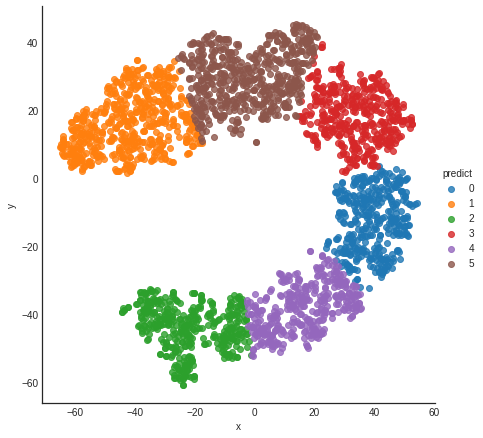

In [101]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=6, hue='predict')